# Description

It takes GLSPhenoplier results on a random phenotype and verifies that the QQ-plots look fine (without inflation).

# Modules

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(qqman)



For example usage please run: vignette('qqman')



Citation appreciated but not required:

Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.





# Paths

In [3]:
GLS_NULL_SIMS_DIR <- Sys.getenv("PHENOPLIER_RESULTS_GLS_NULL_SIMS")

In [4]:
GLS_NULL_SIMS_DIR

[1] "/opt/data/results/gls/null_sims"

In [7]:
# PHENOPLIER_GLS_DIR <- file.path(GLS_NULL_SIMS_DIR, "phenoplier", "gls-1000g-mashr-mean_gene_expr")
PHENOPLIER_GLS_DIR <- file.path(GLS_NULL_SIMS_DIR, "phenoplier", "gls-gtex-mashr-mean_gene_expr")

In [8]:
PHENOPLIER_GLS_DIR

[1] "/opt/data/results/gls/null_sims/phenoplier/gls-gtex-mashr-mean_gene_expr"

# Random pheno 1

Random phenotype 1 has inflation factor of 1

## Load data

In [10]:
glsph <- as.data.frame(read_tsv(file.path(PHENOPLIER_GLS_DIR, "random.pheno1-combined-gls_phenoplier.tsv.gz")))

Rows: 987 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): lv
dbl (2): coef, pvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
dim(glsph)

[1] 987   3

In [12]:
head(glsph)

,lv,coef,pvalue
,<chr>,<dbl>,<dbl>
1,LV1,0.0089210785,0.23477675
2,LV10,0.0233421023,0.03040317
3,LV100,0.0052834016,0.33104711
4,LV101,-0.0129167825,0.85346002
5,LV102,-0.0004173415,0.51313509
6,LV103,-0.0100957739,0.78688943


In [13]:
glsph %>%
  filter(pvalue <= 0.05) %>%
  dim_desc()

[1] "[65 x 3]"

## QQ-plot

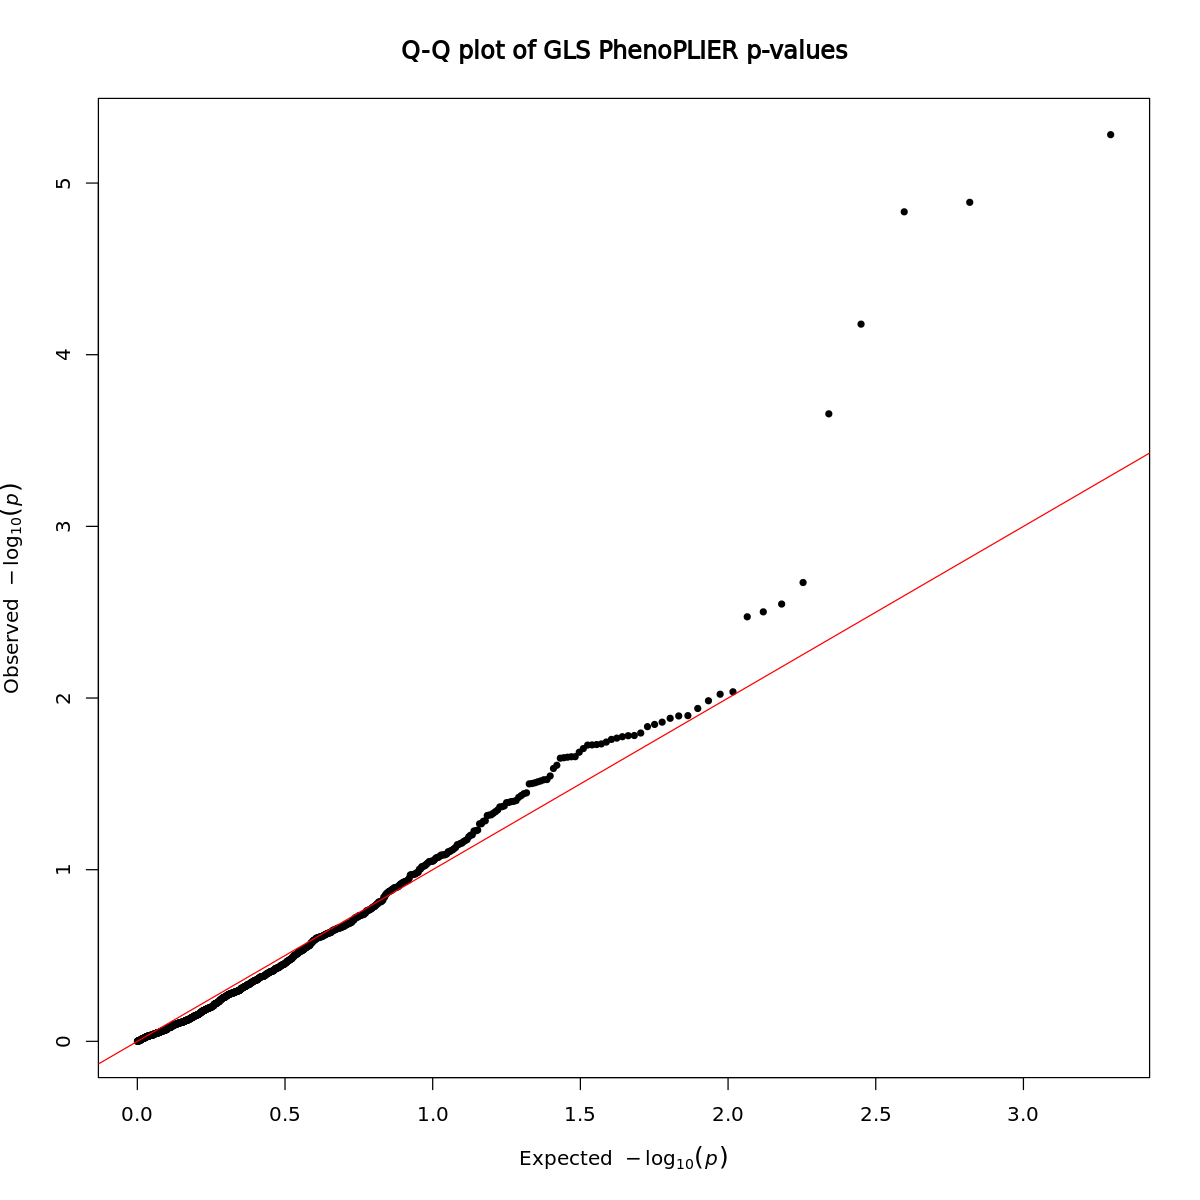

In [14]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(glsph$pvalue, main = "Q-Q plot of GLS PhenoPLIER p-values")

# Random pheno 28

Random phenotype 28 has the largest inflation factor in the original GWAS summary stats (although within the acceptable limits).

## Load data

In [15]:
glsph <- as.data.frame(read_tsv(file.path(PHENOPLIER_GLS_DIR, "random.pheno28-combined-gls_phenoplier.tsv.gz")))

Rows: 987 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1): lv
dbl (2): coef, pvalue

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [16]:
dim(glsph)

[1] 987   3

In [17]:
head(glsph)

,lv,coef,pvalue
,<chr>,<dbl>,<dbl>
1,LV1,-0.002936406,0.59385757
2,LV10,0.004429651,0.36132672
3,LV100,-0.020072637,0.95119767
4,LV101,0.026503528,0.01567852
5,LV102,-0.001826357,0.55715905
6,LV103,-0.007857683,0.73165187


In [18]:
glsph %>%
  filter(pvalue <= 0.05) %>%
  dim_desc()

[1] "[71 x 3]"

## QQ-plot

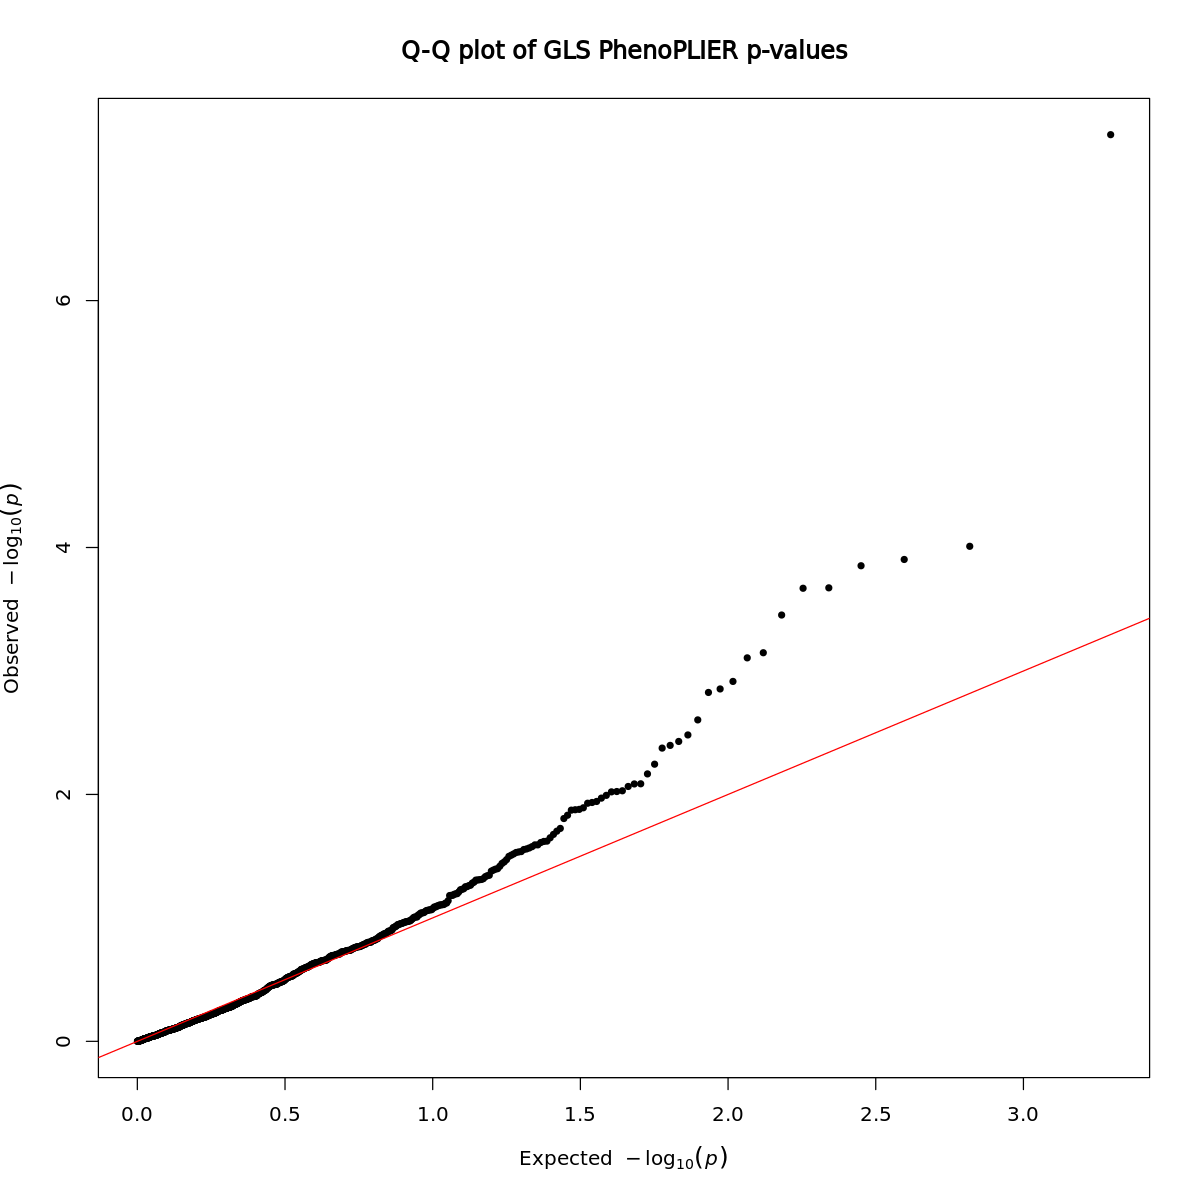

In [19]:
options(repr.plot.width = 10, repr.plot.height = 10)

qq(glsph$pvalue, main = "Q-Q plot of GLS PhenoPLIER p-values")